In [1]:
import os
os.chdir("../../")

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

/home/mohsen/anaconda3/envs/mohsen/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data_name = 'mouse_brain'
data_type = "normalized"

# trVAE

In [4]:
trVAE_scores = pd.read_csv(f"./results/subsample/{data_name}/trVAE_mouse_brain.csv")
trVAE_scores['KNN'] = trVAE_scores['KNN_15']
trVAE_scores['EBM'] = trVAE_scores['EBM_15']
trVAE_scores['Architecture'] = 'trVAE'

# scArches v2

In [5]:
scArches_v2_scores = pd.read_csv(f"./results/subsample/{data_name}/scores_scNet_freeze_level=0.csv")
scArches_v2_scores['Architecture'] = 'scArches trVAE v2'

# scArches v1

In [6]:
scArches_v1_scores = pd.read_csv(f"./results/subsample/{data_name}/scores_scNet_freeze_level=1.csv")
scArches_v1_scores['Architecture'] = 'scArches trVAE v1'

# scArches

In [7]:
scArches_scores = pd.read_csv(f"./results/subsample/{data_name}/scNet_mouse_brain.csv")
scArches_scores['KNN'] = scArches_scores['KNN_15']
scArches_scores['EBM'] = scArches_scores['EBM_15']
scArches_scores['Architecture'] = 'scArches trVAE' 

# scVI scores

In [8]:
scvi_scores = []
for frac_number in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
    df = pd.DataFrame([pd.read_csv(f"./results/subsample/{data_name}/scVI_frac={frac_number}-{i}.csv").iloc[-1, :] for i in range(5)])
    df['subsample fraction'] = frac_number
    df.drop(['Epoch', 'Elapsed Time'], axis=1, inplace=True)
    scvi_scores.append(df)
scvi_scores = pd.concat(scvi_scores)

In [9]:
scvi_scores['Architecture'] = 'scVI'
scvi_scores['KNN'] = scvi_scores['KNN_15']
scvi_scores['EBM'] = scvi_scores['EBM_15']

In [10]:
scvi_scores = scvi_scores[['EBM', 'KNN', 'subsample fraction', 'Architecture']]

# Conos Scores

In [11]:
ks = [15, 25, 50, 100, 200, 300]

In [12]:
columns = ['subsample fraction', 'ASW', 'ARI', 'NMI'] + [f'EBM_{k}' for k in ks] + [f'KNN_{k}' for k in ks]

In [13]:
conos_scores_df = [pd.read_csv(f"./results/subsample/Conos/{data_name}/{i}.log", header=None) for i in range(5)]
conos_scores_df = pd.concat(conos_scores_df)

In [14]:
conos_scores_df.columns = columns

In [15]:
conos_scores_df['Architecture'] = 'Conos'
conos_scores_df['KNN'] = conos_scores_df['KNN_15']
conos_scores_df['EBM'] = conos_scores_df['EBM_15']

# Seurat scores

In [16]:
columns = ['subsample fraction', 'ASW', 'ARI', 'NMI'] + [f'EBM_{k}' for k in ks] + [f'KNN_{k}' for k in ks]

In [17]:
seurat_scores_df = [pd.read_csv(f"./results/subsample/Seurat/{data_name}/{i}.log", header=None) for i in range(5)]
seurat_scores_df = pd.concat(seurat_scores_df)

In [18]:
seurat_scores_df.columns = columns

In [19]:
seurat_scores = seurat_scores_df

In [20]:
seurat_scores['Architecture'] = 'Seurat v3'
seurat_scores['KNN'] = seurat_scores['KNN_15']
seurat_scores['EBM'] = seurat_scores['EBM_15']

# MNNCorrect

In [21]:
mnn_scores_df = [pd.read_csv(f"./results/subsample/mnnCorrect/{data_name}/{i}.log", header=None) for i in range(5)]
mnn_scores_df = pd.concat(mnn_scores_df)

In [22]:
mnn_scores_df.columns = columns

In [23]:
mnn_scores = mnn_scores_df

In [24]:
mnn_scores['Architecture'] = 'MNN Correct'
mnn_scores['KNN'] = mnn_scores['KNN_15']
mnn_scores['EBM'] = mnn_scores['EBM_15']

# Liger

In [25]:
liger_scores_df = [pd.read_csv(f"./results/subsample/Liger/{data_name}/{i}.log", header=None) for i in range(5)]
liger_scores_df = pd.concat(liger_scores_df)

In [26]:
liger_scores_df.columns = columns

In [27]:
liger_scores = liger_scores_df

In [28]:
liger_scores['Architecture'] = 'Liger'
liger_scores['KNN'] = liger_scores['KNN_15']
liger_scores['EBM'] = liger_scores['EBM_15']

# Harmony

In [29]:
harmony_scores_df = [pd.read_csv(f"./results/subsample/Harmony/{data_name}/{i}.log", header=None) for i in range(5)]
harmony_scores_df = pd.concat(harmony_scores_df)

In [30]:
harmony_scores_df.columns = columns

In [31]:
harmony_scores = harmony_scores_df

In [32]:
harmony_scores['Architecture'] = 'Harmony'
harmony_scores['KNN'] = harmony_scores['KNN_15']
harmony_scores['EBM'] = harmony_scores['EBM_15']

# Scanorama

In [33]:
scanorama_scores_df = [pd.read_csv(f"./results/subsample/Scanorama/{data_name}/{i}.log", header=None) for i in range(5)]
scanorama_scores_df = pd.concat(scanorama_scores_df)

In [34]:
scanorama_scores_df.columns = columns

In [35]:
scanorama_scores = scanorama_scores_df

In [36]:
scanorama_scores['Architecture'] = 'Scanorama'
scanorama_scores['KNN'] = scanorama_scores['KNN_15']
scanorama_scores['EBM'] = scanorama_scores['EBM_15']

# Integrating results

In [37]:
results_df = pd.concat([trVAE_scores, scArches_scores, scArches_v1_scores, scArches_v2_scores, 
                        scvi_scores, mnn_scores, seurat_scores, 
                        scanorama_scores, liger_scores, harmony_scores, conos_scores_df])




# Subsampling Plot

In [38]:
plot_columns = ["EBM", "KNN", "EBM+KNN"]

In [39]:
sns.set(style='whitegrid')

In [40]:
import matplotlib
font = {'family' : 'Arial',
        'size'   : 30}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=50)
matplotlib.rc('xtick', labelsize=50)

In [41]:
n_samples = 5387 if data_name == 'pancreas' else 15250

In [42]:
results_df['subsample_number'] = results_df['subsample fraction'] * n_samples
results_df['subsample_number'] = results_df['subsample_number'].astype('int32')

In [43]:
ks = [15, 25, 50, 100, 200, 300]

In [44]:
for k in ks:
    results_df[f'KNN+EBM_{k}'] = results_df[f'KNN_{k}'] + results_df[f'EBM_{k}']

In [45]:
results_df_cmpr = results_df[~results_df['Architecture'].isin(['scArches trVAE v1', 'scArches trVAE v2'])]

In [46]:
results_df_cmpr_melted = results_df_cmpr.drop(['ASW', 'NMI', 'ARI', 'EBM', 'KNN'], axis=1)
results_df_cmpr_melted = pd.melt(results_df_cmpr_melted, id_vars=['Architecture', 'subsample_number', 'subsample fraction'], var_name='type')

In [47]:
results_df_cmpr_melted['K'] = results_df_cmpr_melted['type'].apply(lambda x: x.split("_")[1])
results_df_cmpr_melted['type'] = results_df_cmpr_melted['type'].apply(lambda x: x.split("_")[0])

KNN_15


/home/mohsen/anaconda3/envs/mohsen/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


<Figure size 864x720 with 0 Axes>

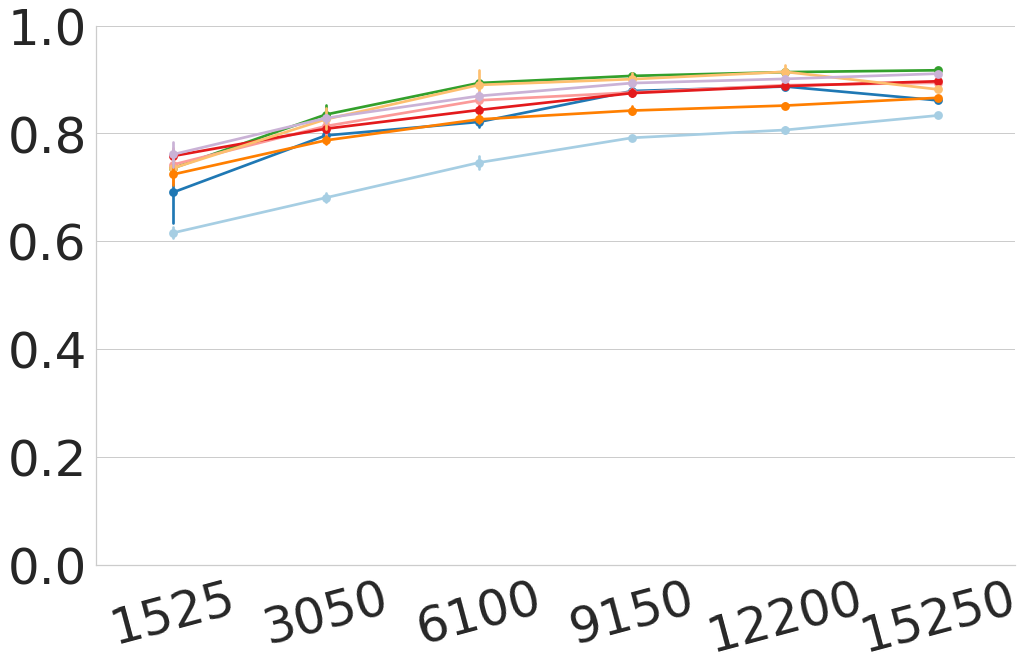

EBM_15


<Figure size 864x720 with 0 Axes>

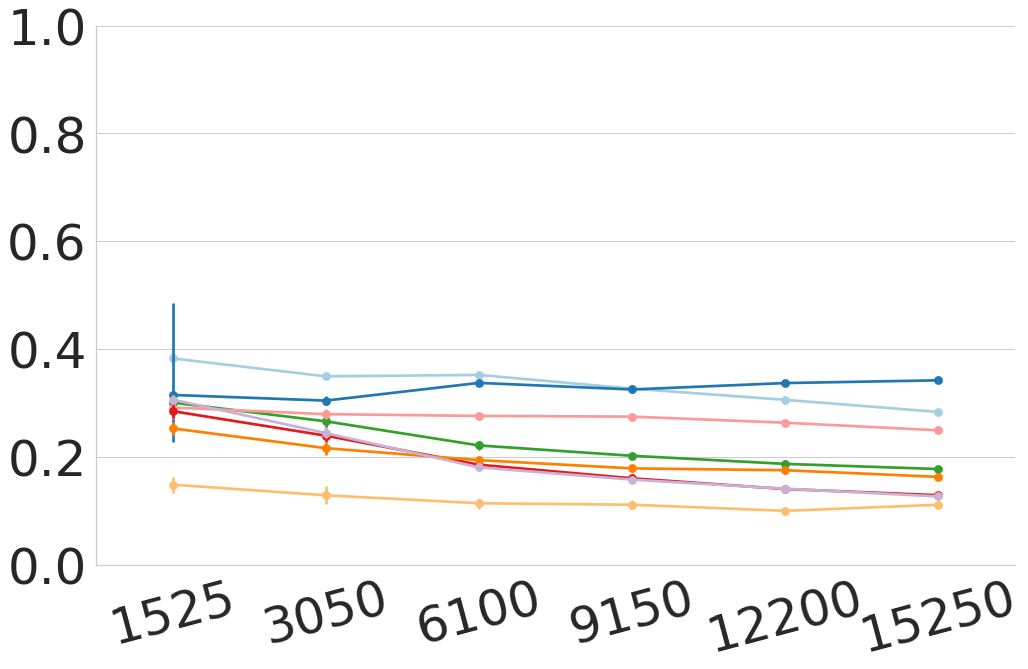

KNN+EBM_15


<Figure size 864x720 with 0 Axes>

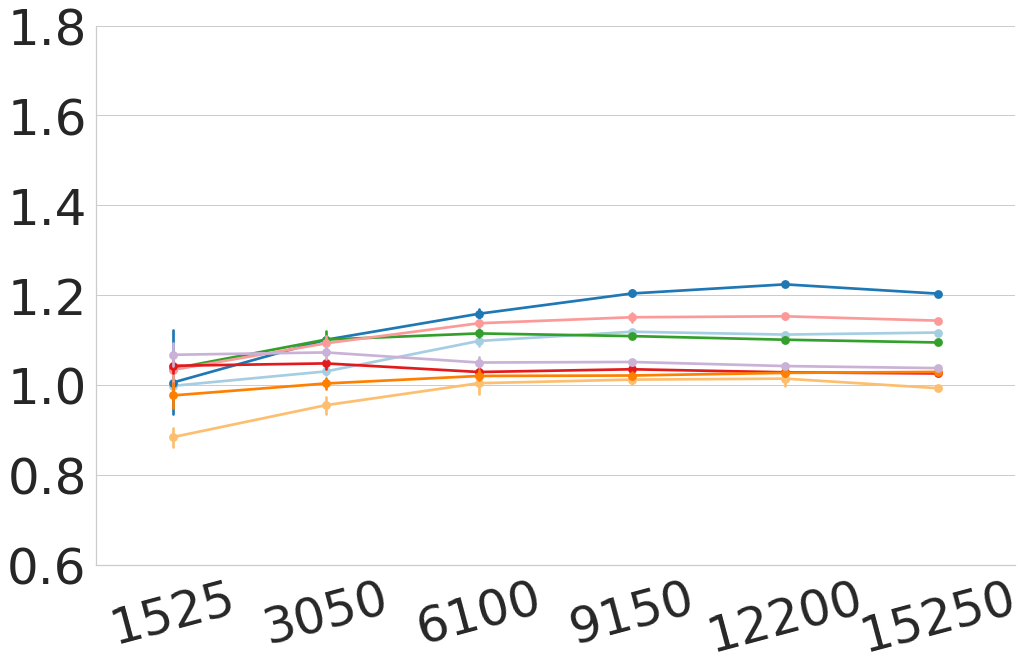

KNN_25


<Figure size 864x720 with 0 Axes>

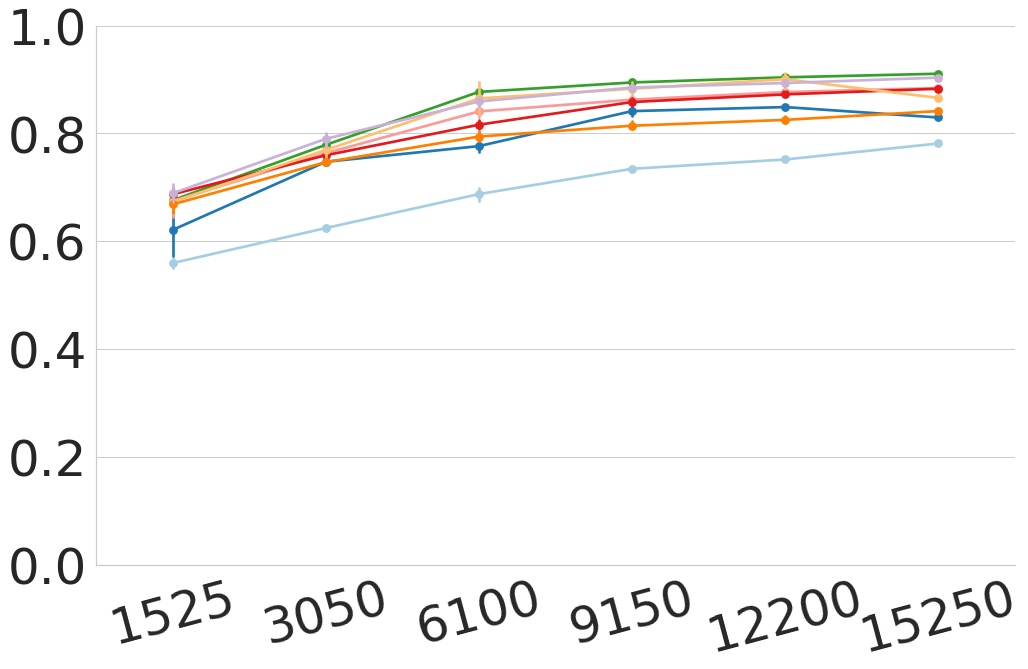

EBM_25


<Figure size 864x720 with 0 Axes>

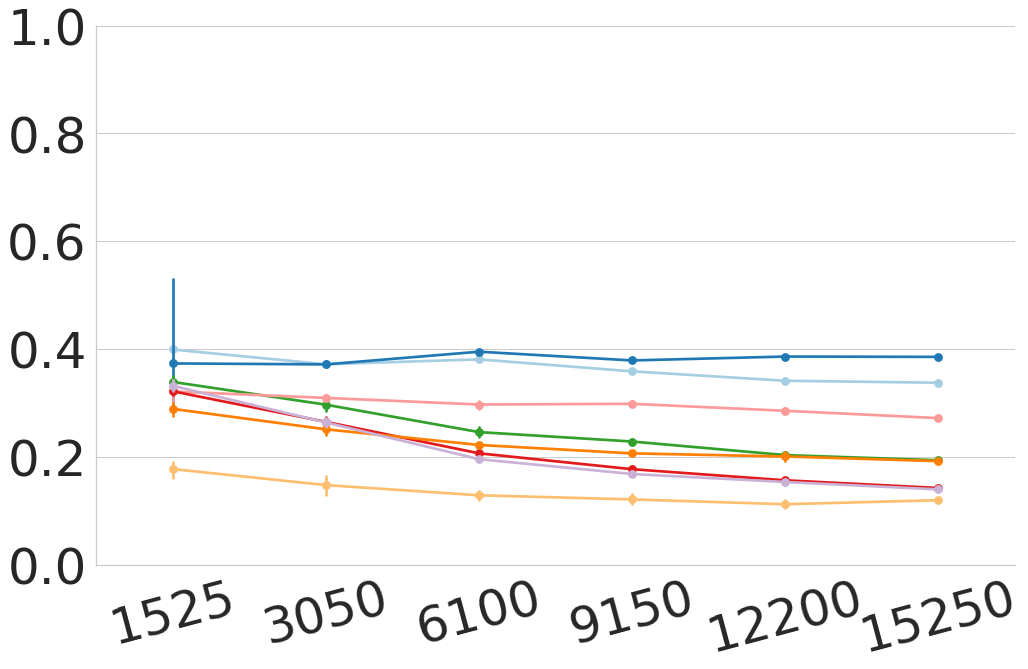

KNN+EBM_25


<Figure size 864x720 with 0 Axes>

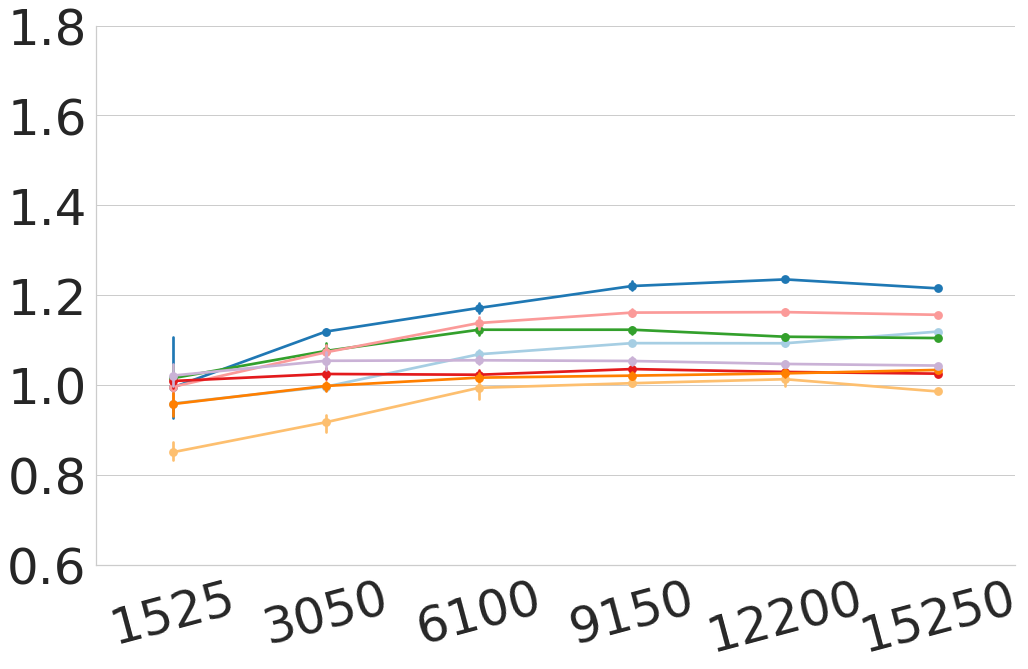

KNN_50


<Figure size 864x720 with 0 Axes>

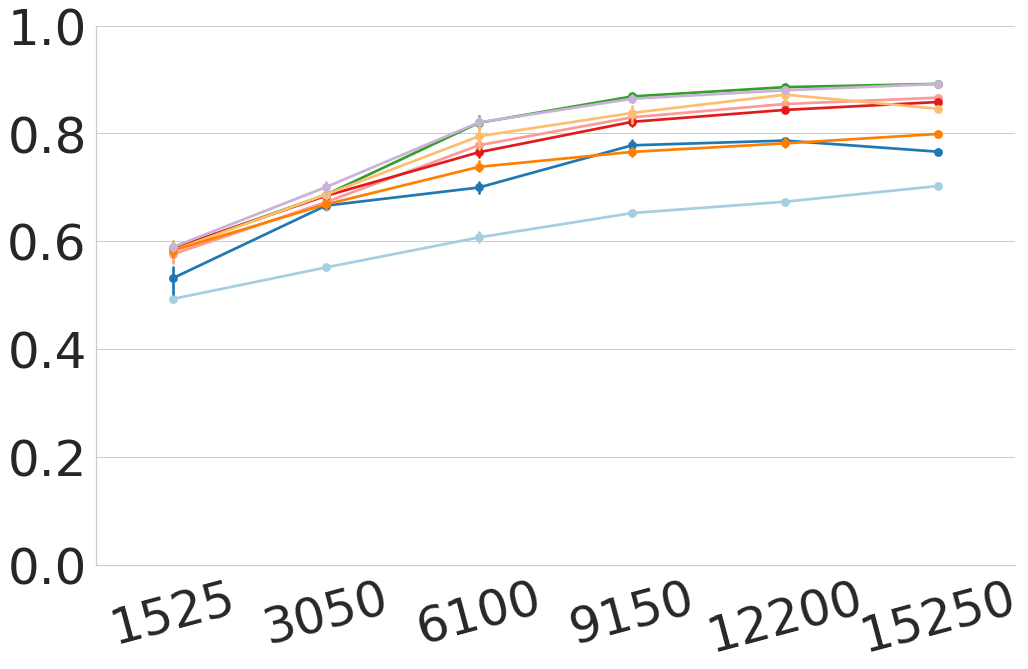

EBM_50


<Figure size 864x720 with 0 Axes>

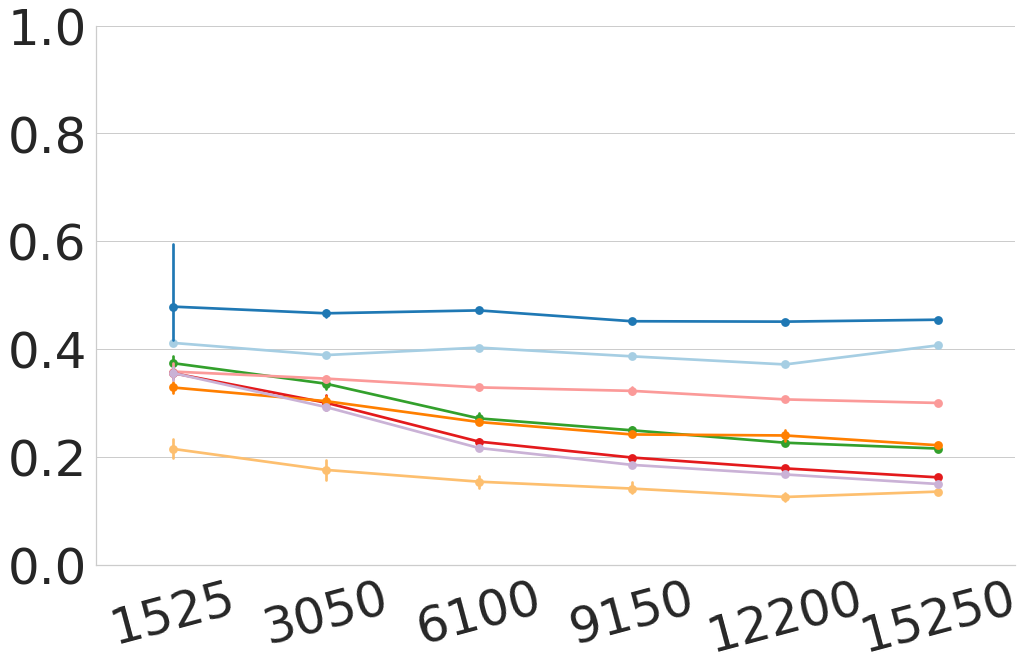

KNN+EBM_50


<Figure size 864x720 with 0 Axes>

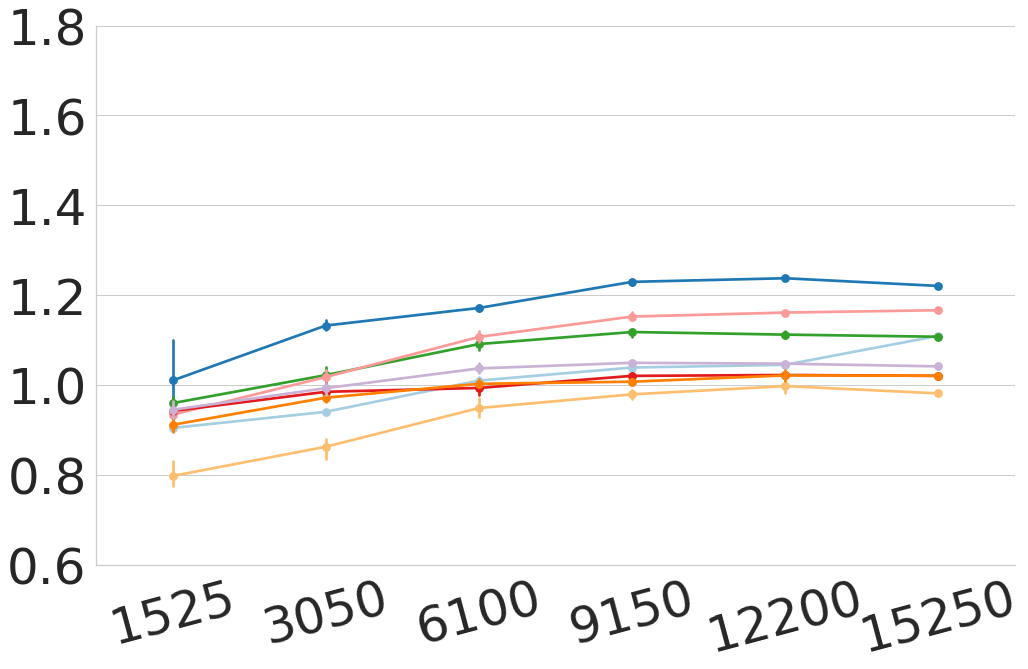

KNN_100


<Figure size 864x720 with 0 Axes>

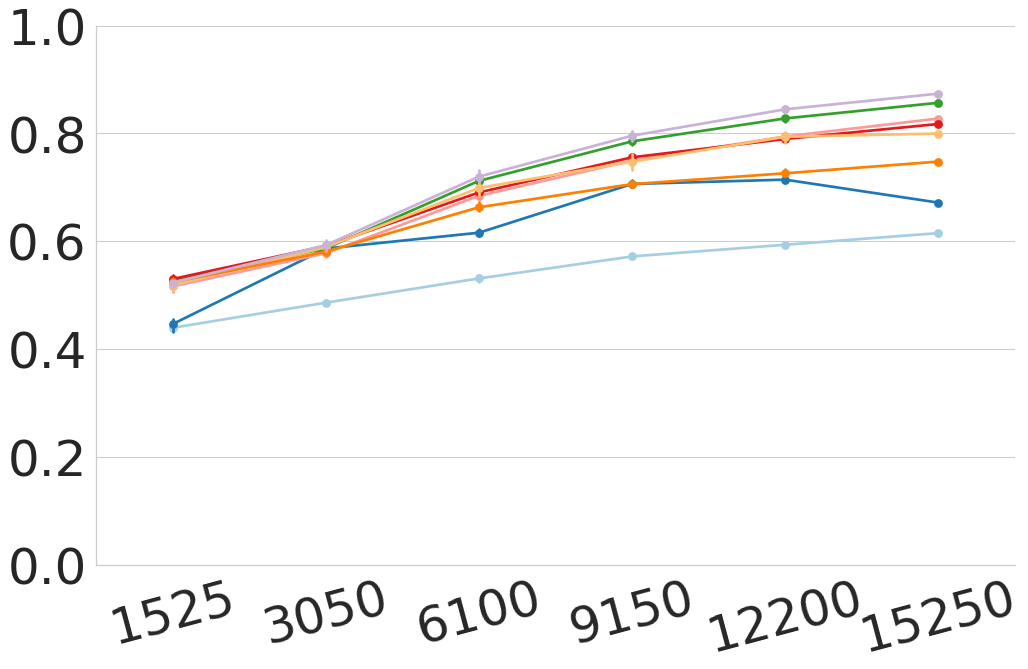

EBM_100


<Figure size 864x720 with 0 Axes>

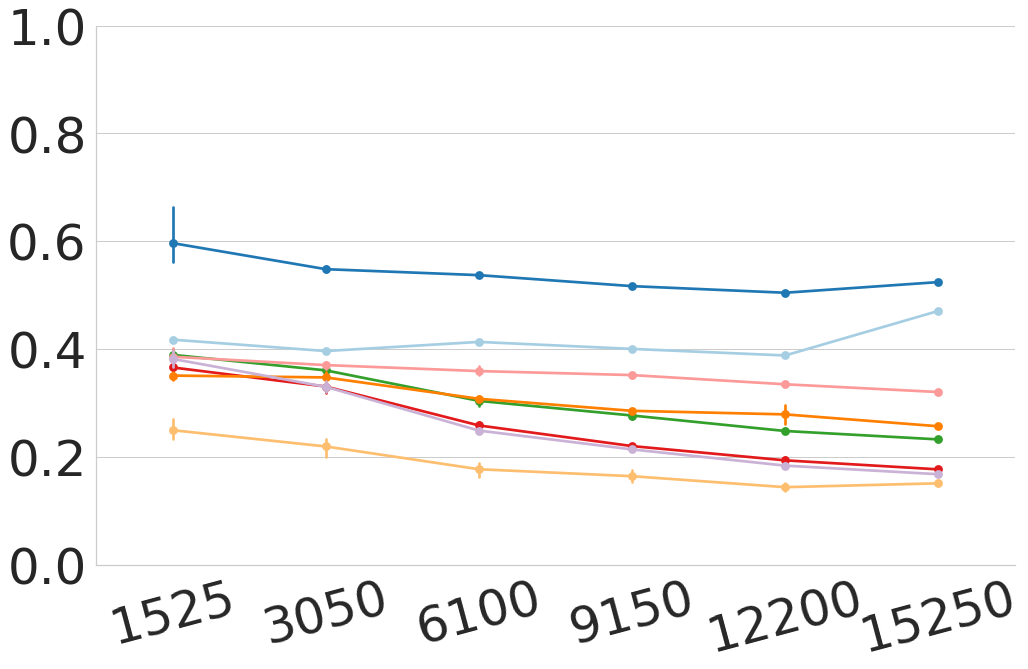

KNN+EBM_100


<Figure size 864x720 with 0 Axes>

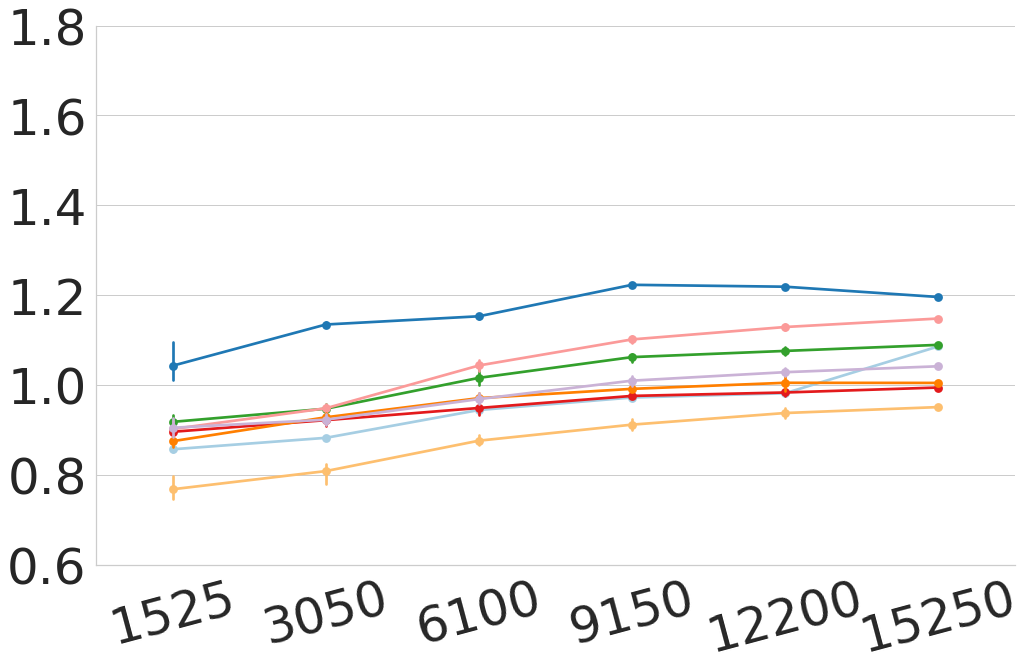

KNN_200


<Figure size 864x720 with 0 Axes>

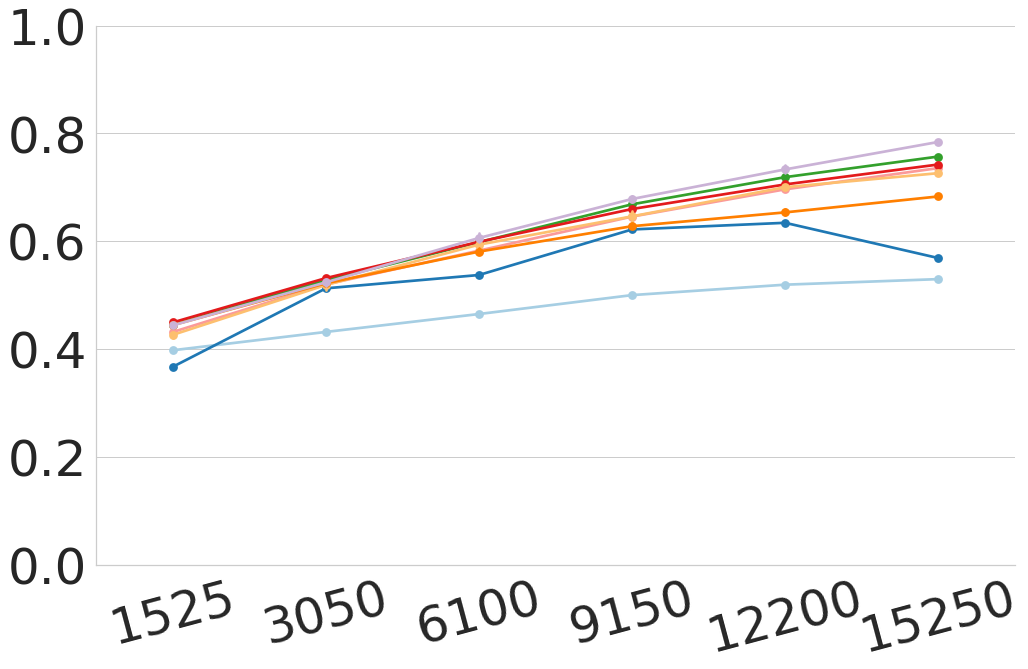

EBM_200


<Figure size 864x720 with 0 Axes>

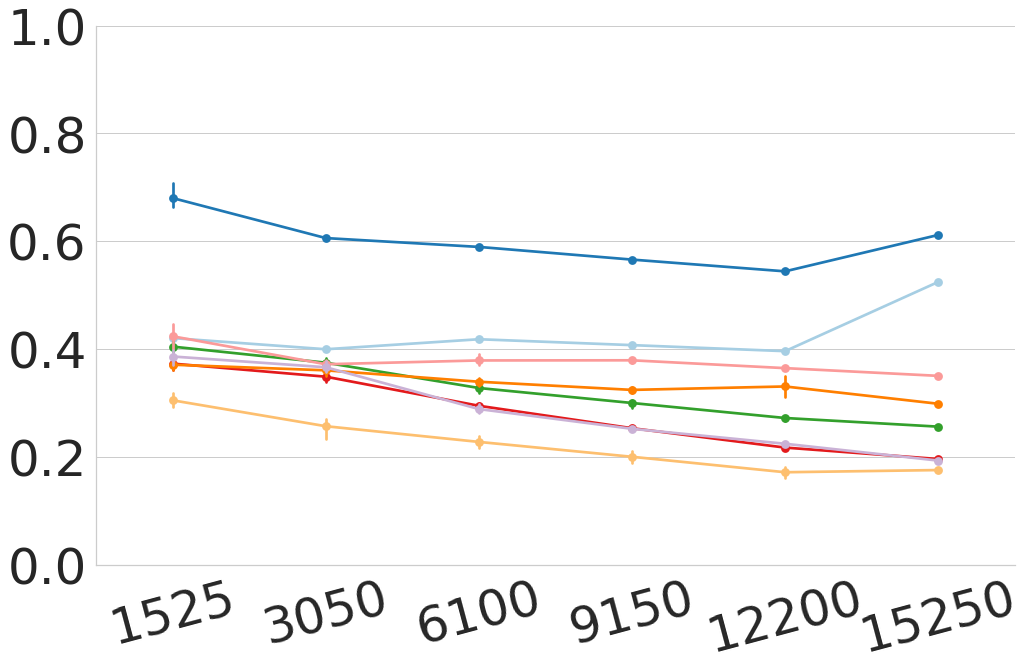

KNN+EBM_200


<Figure size 864x720 with 0 Axes>

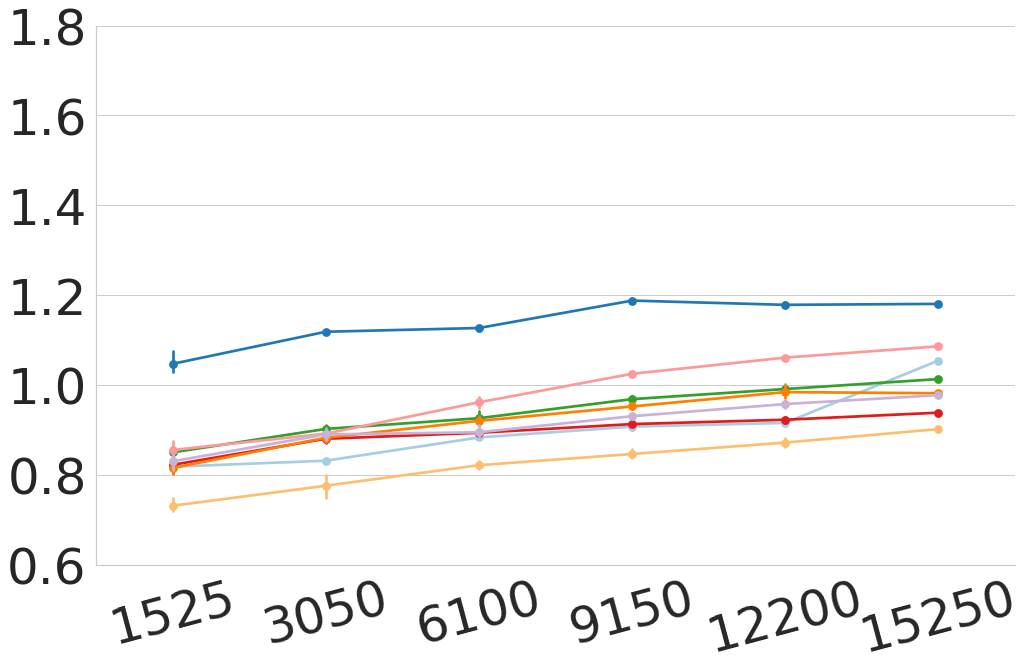

KNN_300


<Figure size 864x720 with 0 Axes>

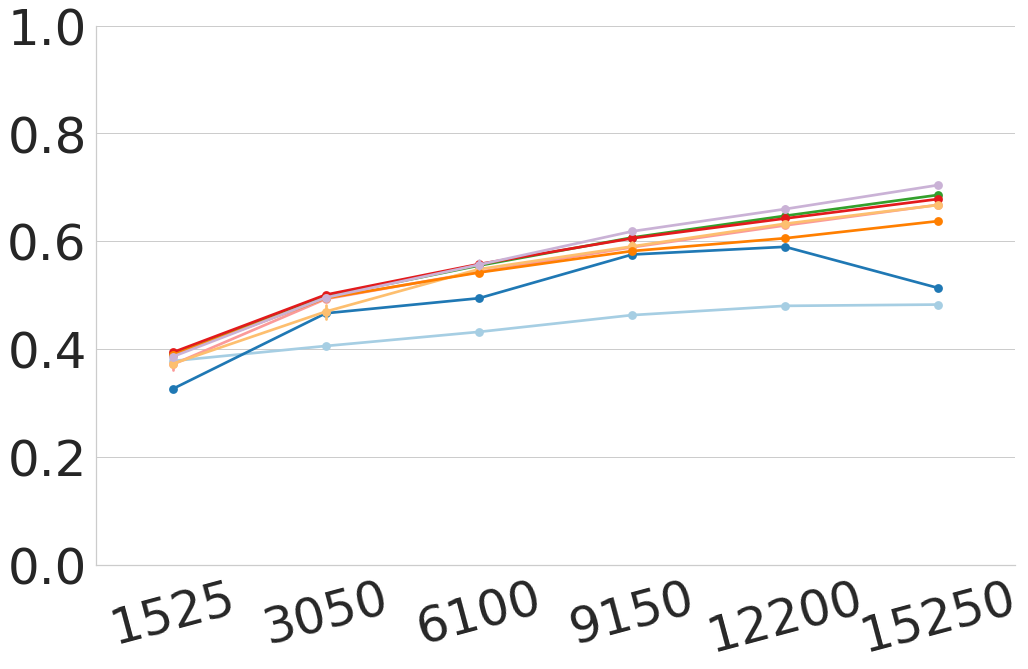

EBM_300


<Figure size 864x720 with 0 Axes>

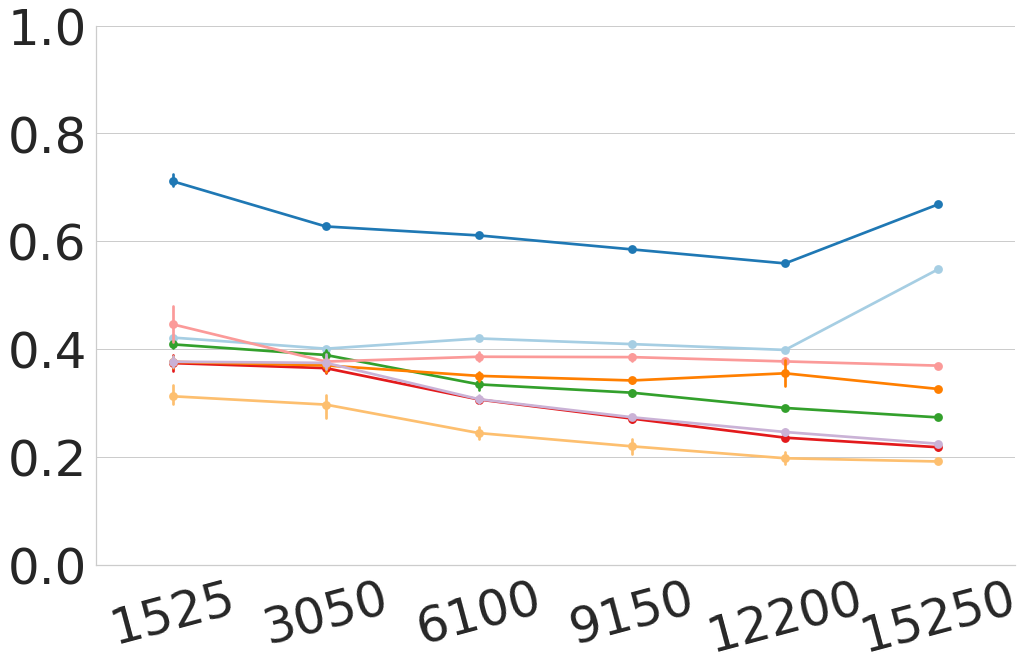

KNN+EBM_300


<Figure size 864x720 with 0 Axes>

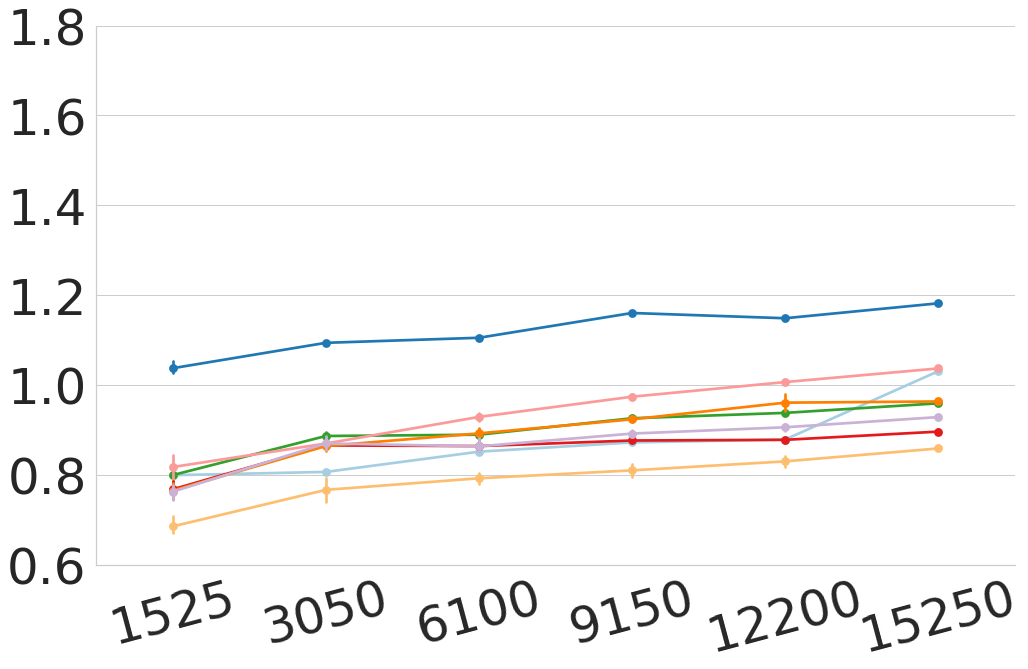

In [48]:
for k in ks:
    plot_columns = [f'KNN_{k}', f'EBM_{k}', f'KNN+EBM_{k}']
    for idx, score in enumerate(plot_columns):
        print(score)
        plt.close("all")
        plt.figure(figsize=(12, 10))
        plot_data = results_df_cmpr_melted[results_df_cmpr_melted['K'] == k]
        g = sns.catplot(x="subsample_number", y=score, hue="Architecture", kind="point", 
                        data=results_df_cmpr, legend=False,
                        height=10, aspect=1.5, palette=sns.color_palette("Paired", 9))
        plt.xlabel('', fontsize=22)
        plt.ylabel("", fontsize=22)
        plt.xticks(rotation=15)
        if score in [f'EBM_{k}', f'KNN_{k}']:
            plt.ylim(0, 1)
            plt.yticks(np.arange(0, 1.2, 0.2))
        else:
            plt.ylim(0.6, 1.6)
            plt.yticks(np.arange(0.6, 1.8, 0.2))
    #     plt.title(score)
#         if idx == 0:
#             plt.legend(bbox_to_anchor=(1.05,0.5), borderaxespad=0, loc='center left', prop={'size': 18})
        plt.tight_layout()
        os.makedirs(f"./results/subsample/{data_name}/pointplot/", exist_ok=True)
        plt.savefig(f"./results/subsample/{data_name}/pointplot/{score}.pdf", dpi=300)
        plt.show()
# plt.savefig("./results/subsample/toy/scNet.pdf")
# plt.ylim(0.0, 0.5)

# Different K point plots

In [49]:
results_df_cmpr_melted = results_df_cmpr.drop(['ASW', 'NMI', 'ARI', 'EBM', 'KNN'], axis=1)

In [50]:
results_df_cmpr_melted = pd.melt(results_df_cmpr_melted, id_vars=['Architecture', 'subsample_number', 'subsample fraction'], var_name='type')

In [51]:
results_df_cmpr_melted['K'] = results_df_cmpr_melted['type'].apply(lambda x: x.split("_")[1])
results_df_cmpr_melted['type'] = results_df_cmpr_melted['type'].apply(lambda x: x.split("_")[0])

In [52]:
results_df_cmpr_melted

,Architecture,subsample_number,subsample fraction,type,value,K
0,trVAE,1525,0.1,EBM,0.387747,15
1,trVAE,3050,0.2,EBM,0.347467,15
2,trVAE,6100,0.4,EBM,0.354472,15
3,trVAE,9150,0.6,EBM,0.325536,15
4,trVAE,12200,0.8,EBM,0.303400,15
...,...,...,...,...,...,...
4711,Conos,3050,0.2,KNN+EBM,0.868822,300
4712,Conos,6100,0.4,KNN+EBM,0.859380,300
4713,Conos,9150,0.6,KNN+EBM,0.881995,300
4714,Conos,12200,0.8,KNN+EBM,0.893450,300


<Figure size 864x720 with 0 Axes>

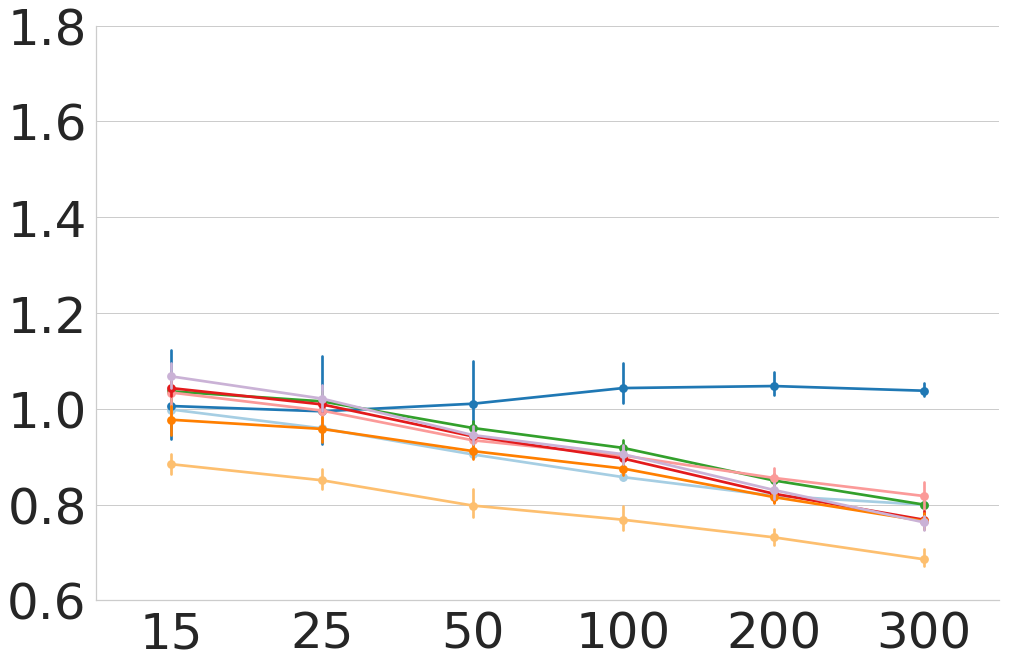

<Figure size 864x720 with 0 Axes>

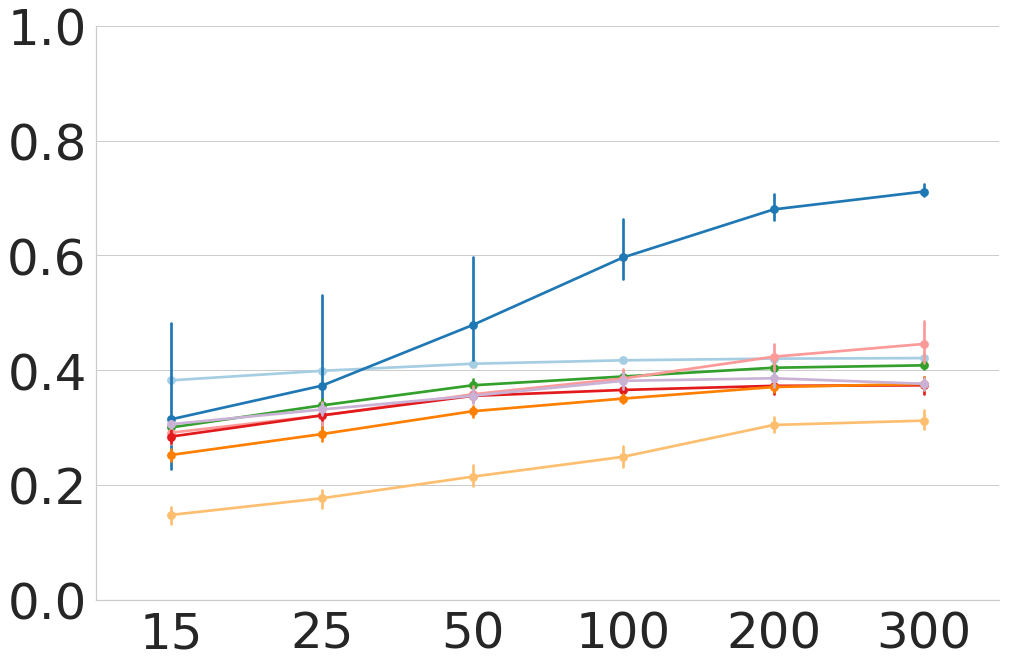

<Figure size 864x720 with 0 Axes>

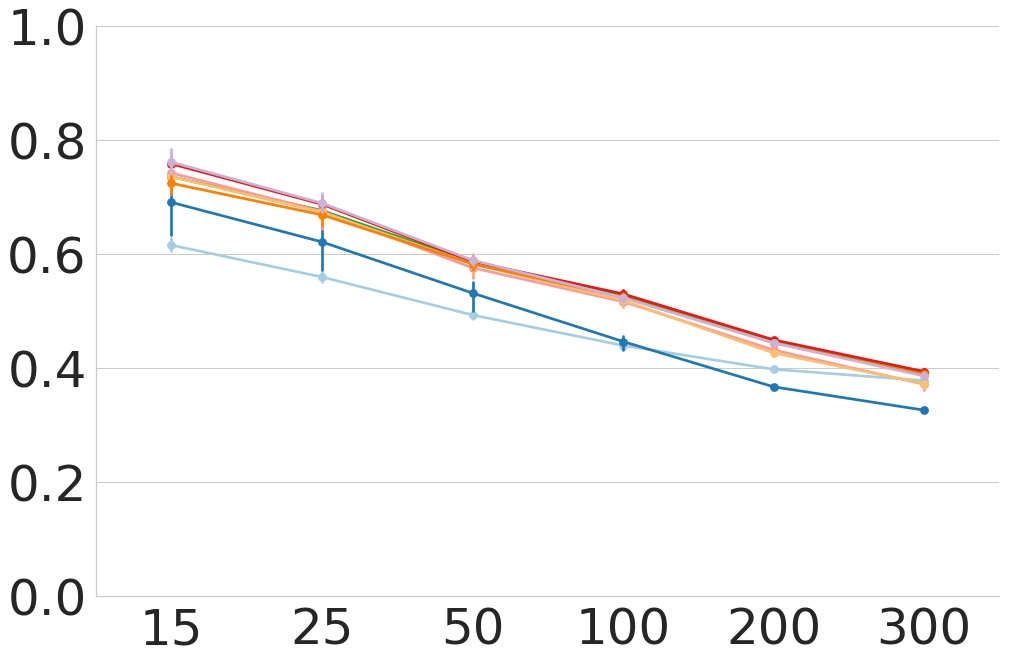

<Figure size 864x720 with 0 Axes>

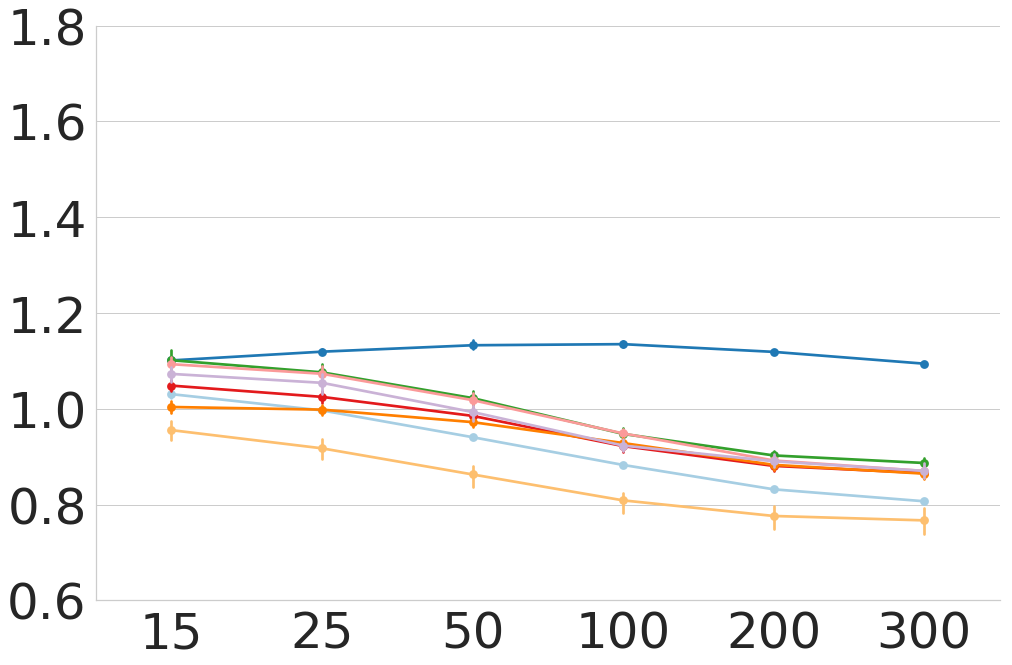

<Figure size 864x720 with 0 Axes>

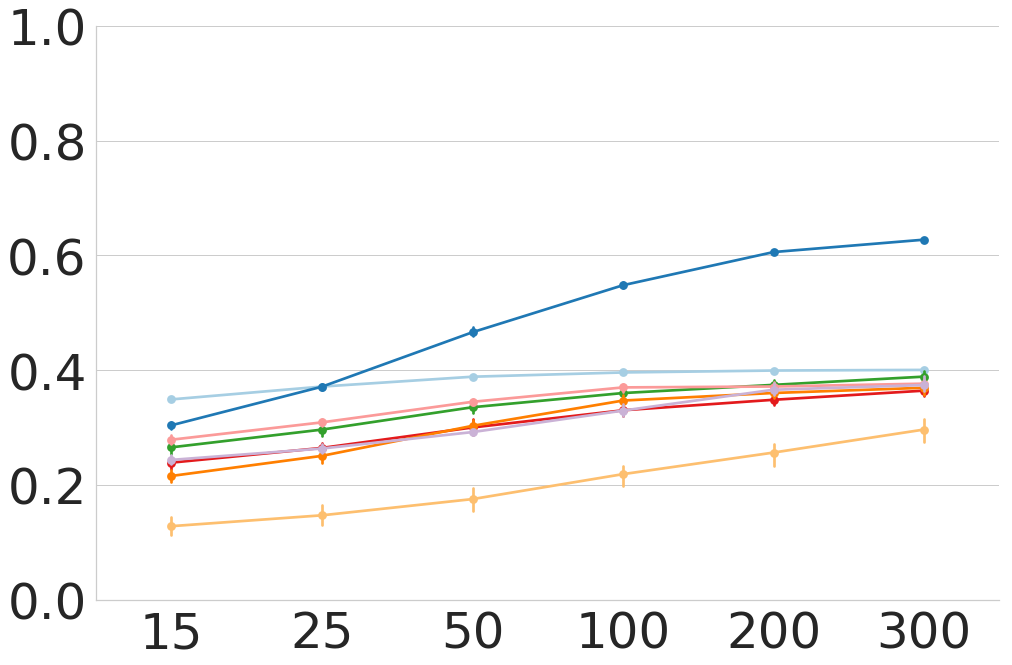

<Figure size 864x720 with 0 Axes>

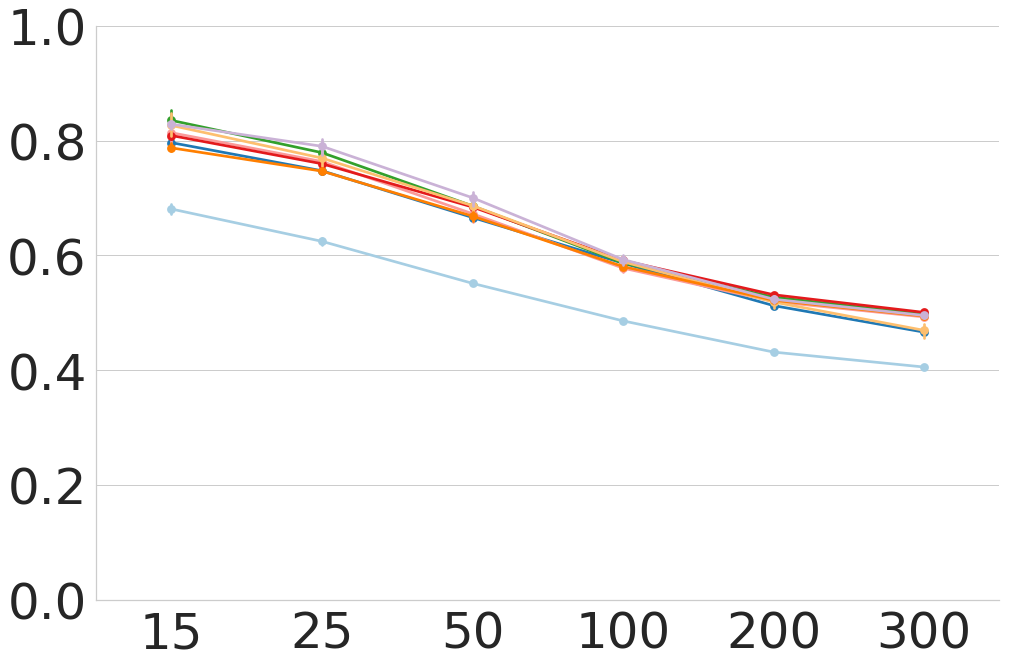

<Figure size 864x720 with 0 Axes>

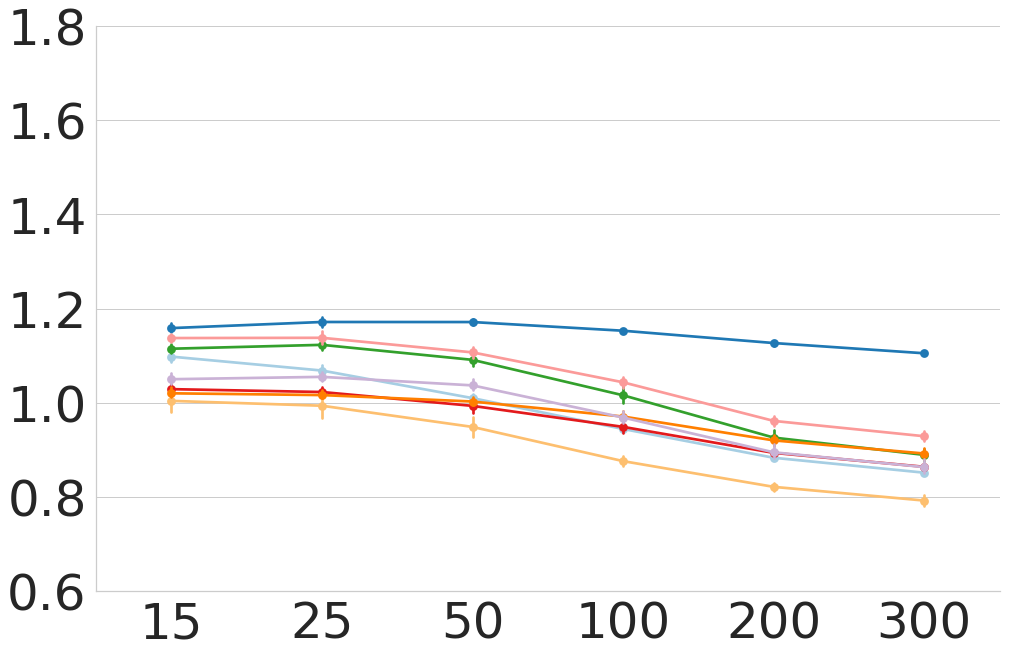

<Figure size 864x720 with 0 Axes>

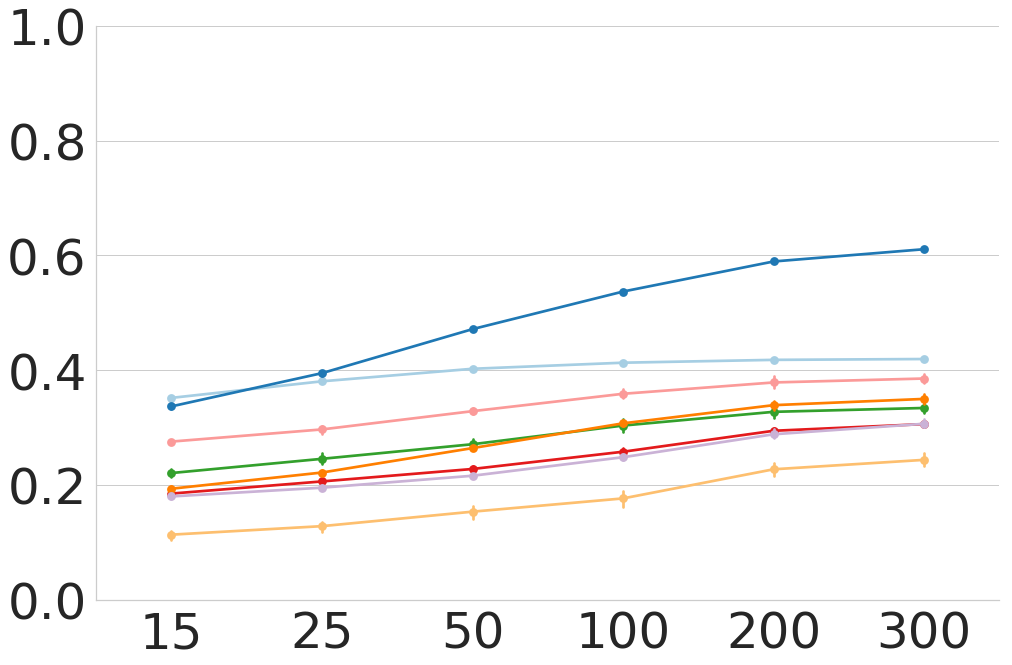

<Figure size 864x720 with 0 Axes>

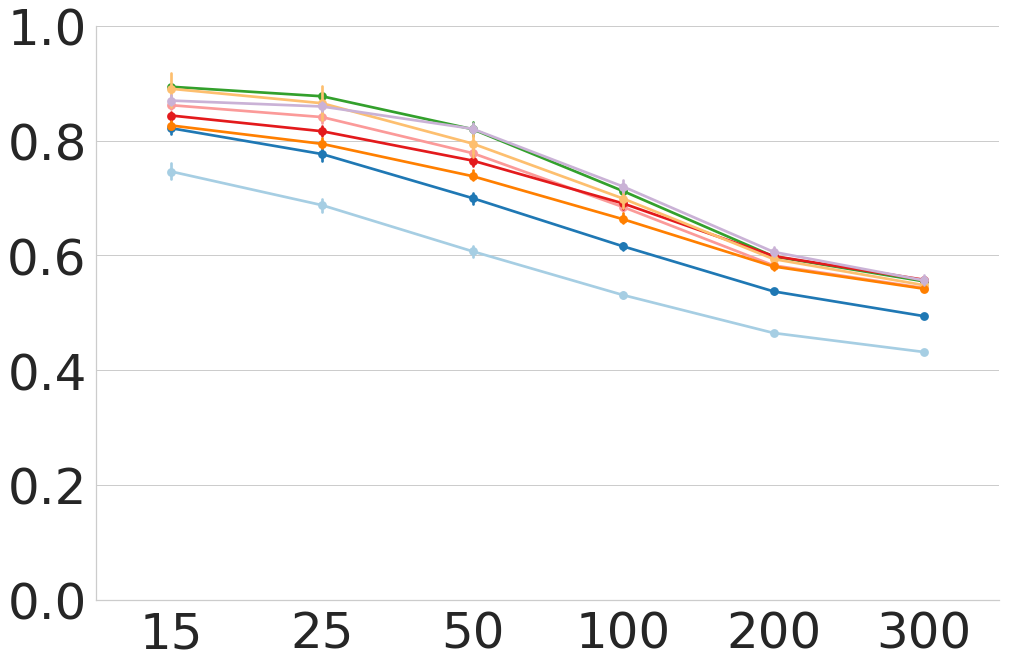

<Figure size 864x720 with 0 Axes>

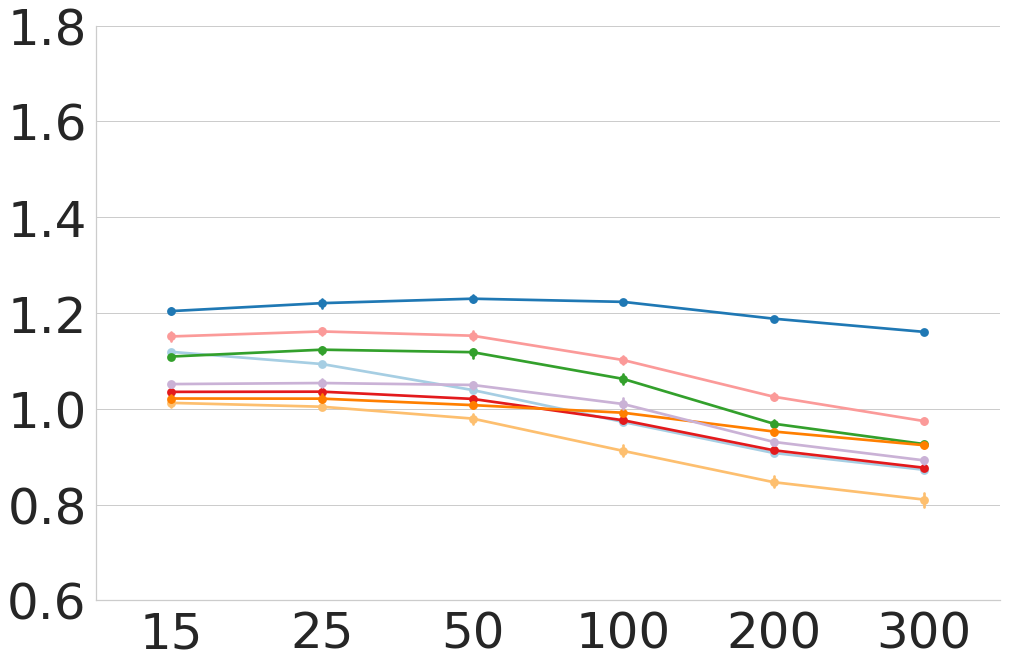

<Figure size 864x720 with 0 Axes>

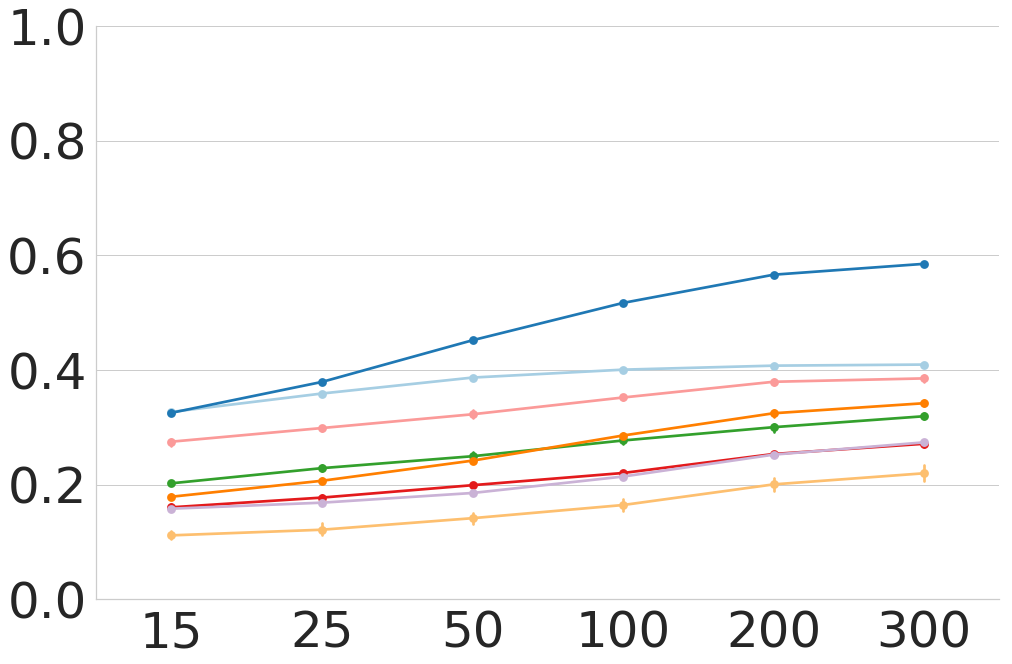

<Figure size 864x720 with 0 Axes>

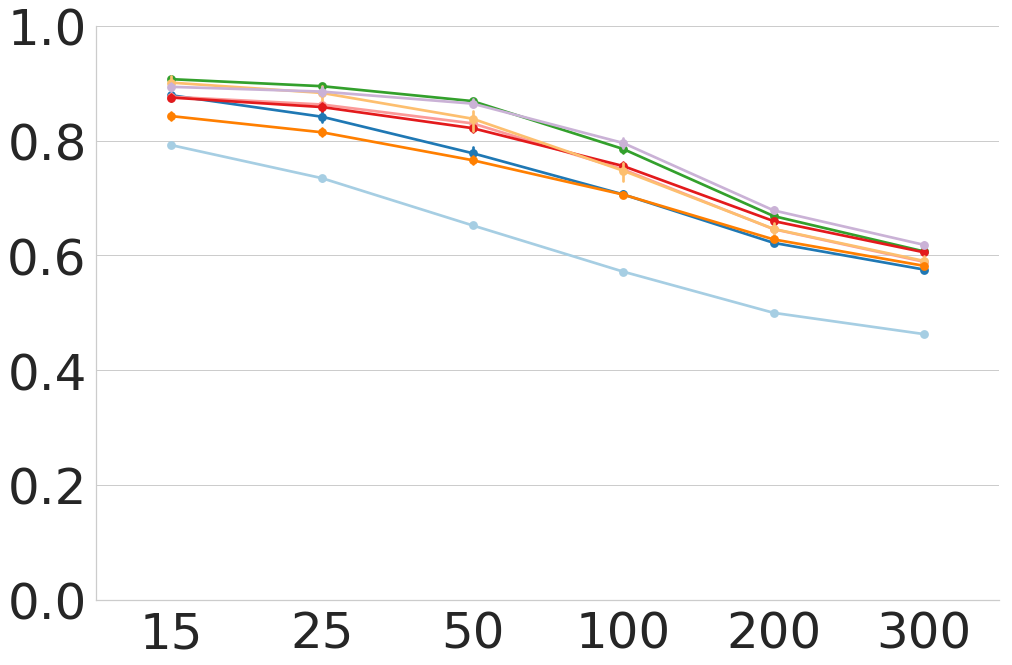

<Figure size 864x720 with 0 Axes>

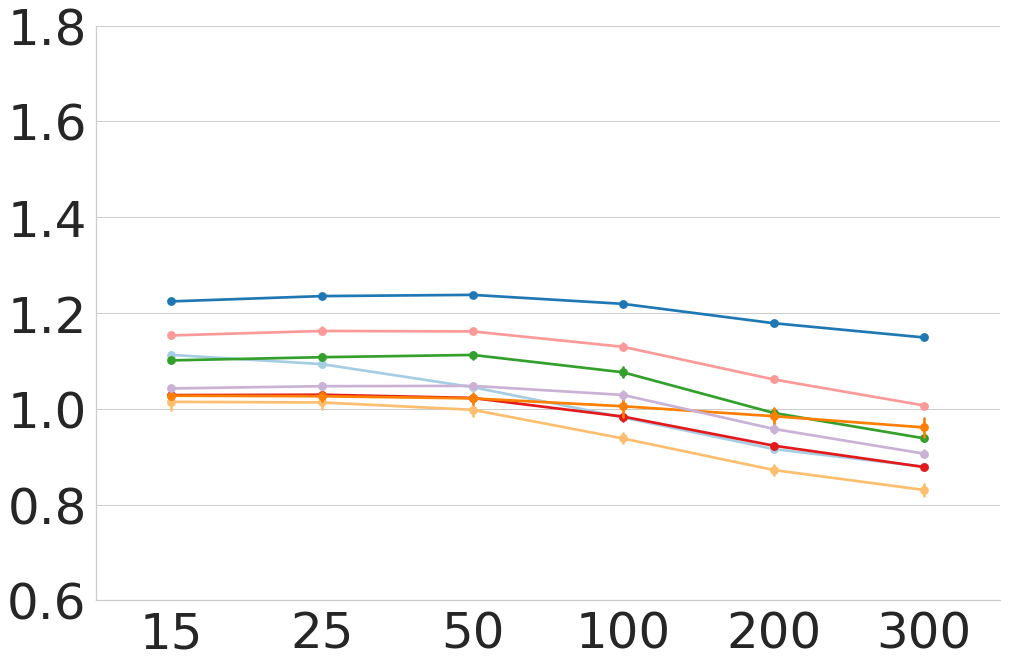

<Figure size 864x720 with 0 Axes>

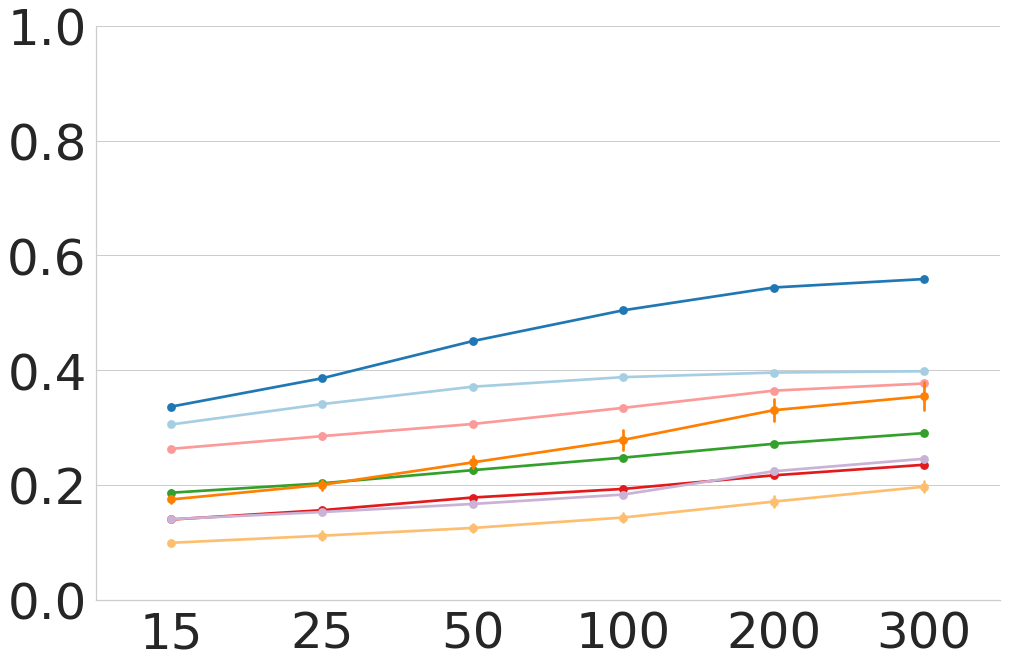

<Figure size 864x720 with 0 Axes>

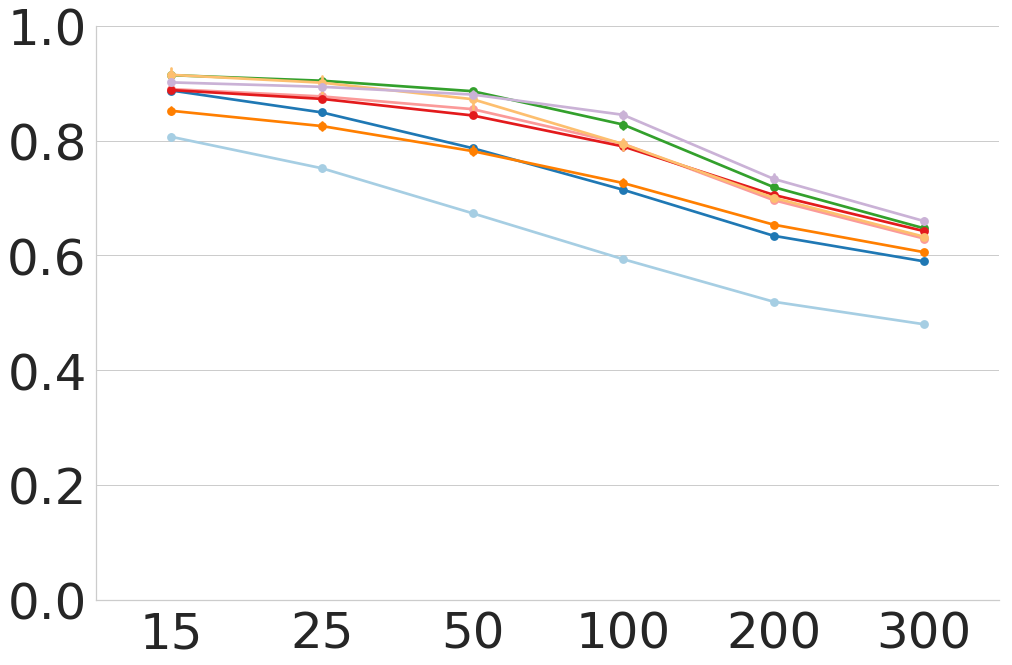

<Figure size 864x720 with 0 Axes>

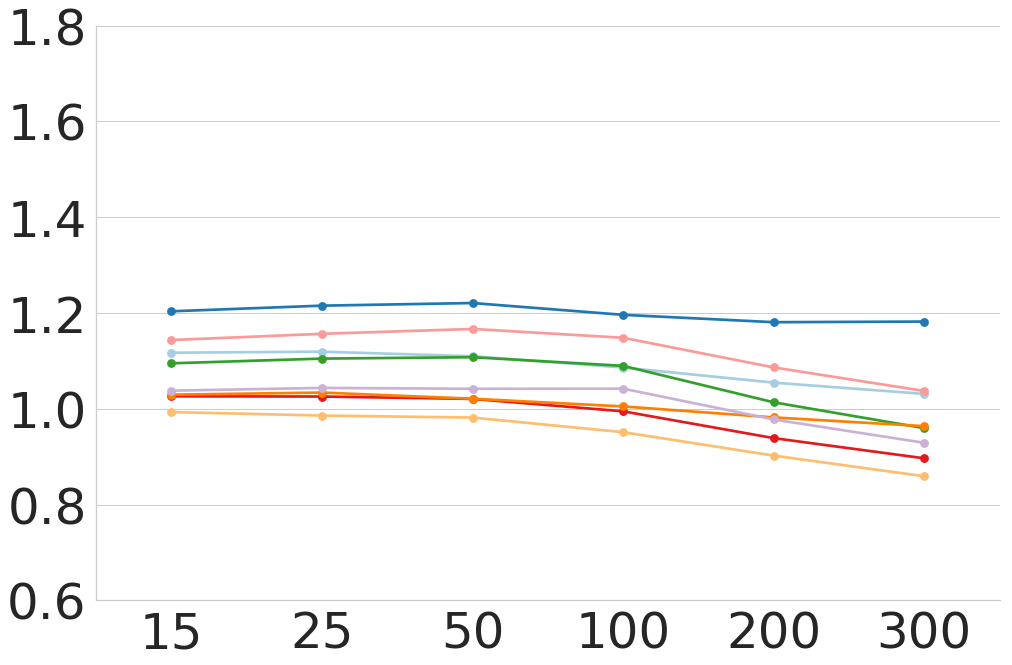

<Figure size 864x720 with 0 Axes>

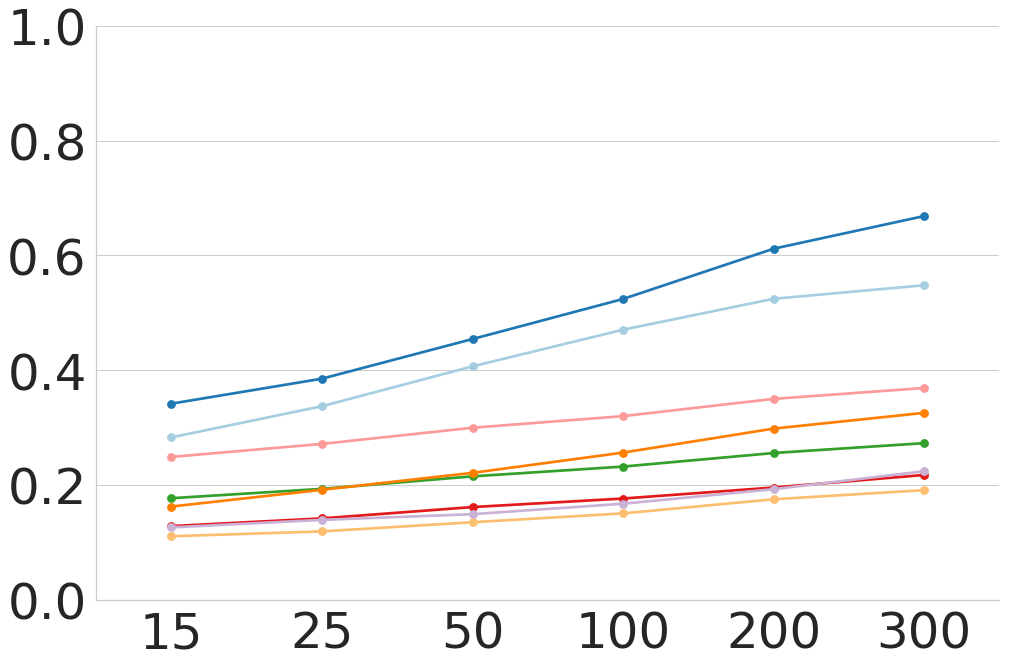

<Figure size 864x720 with 0 Axes>

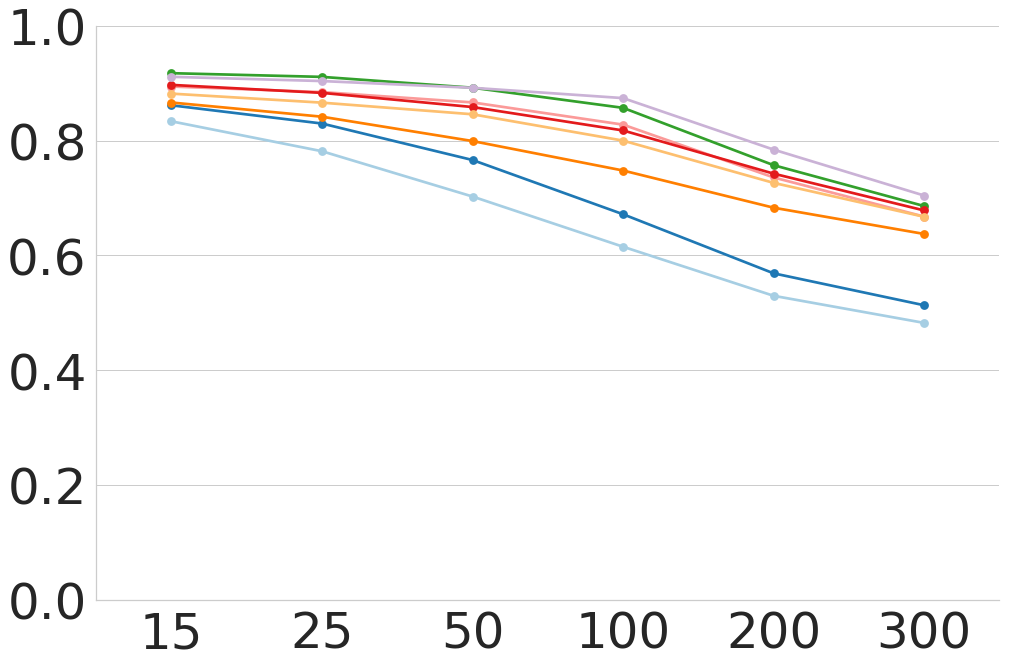

In [54]:
for fraction in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
    for metric in ['KNN+EBM', 'EBM', 'KNN']:
        plot_data = results_df_cmpr_melted[results_df_cmpr_melted['subsample fraction'] == fraction]
        plot_data = plot_data[plot_data['type'] == metric]
        plot_data['K'] = plot_data['K'].astype('int32')
        plt.close("all")
        plt.figure(figsize=(12, 10))
        g = sns.catplot(x='K', y='value', hue="Architecture", kind="point", 
                        data=plot_data, legend=False, height=10, aspect=1.5, 
                        palette=sns.color_palette("Paired", 9))
        plt.xlabel('', fontsize=22)
        plt.ylabel("", fontsize=22)
#         plt.xticks(rotation=0)
        if metric in ['EBM', 'KNN', 'HarmonicMean']:
            plt.ylim(0, 1)
            plt.yticks(np.arange(0, 1.2, 0.2))
        else:
            plt.ylim(0.6, 1.6)
            plt.yticks(np.arange(0.6, 1.8, 0.2))
    #     if idx == 0:
    #         plt.legend(bbox_to_anchor=(1.05,0.5), borderaxespad=0, loc='center left', prop={'size': 18})
#         plt.tight_layout()
        os.makedirs(f"./results/subsample/{data_name}/pointplot/different_ks/", exist_ok=True)
        plt.savefig(f"./results/subsample/{data_name}/pointplot/different_ks/{fraction}-{metric}.pdf", dpi=300)
        plt.show()

# Scatter (EBM vs. KNN)

In [55]:
sns.set(style='whitegrid')
import matplotlib
font = {'family' : 'Arial',
        'size'   : 30}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=40)
matplotlib.rc('xtick', labelsize=40)

0.1


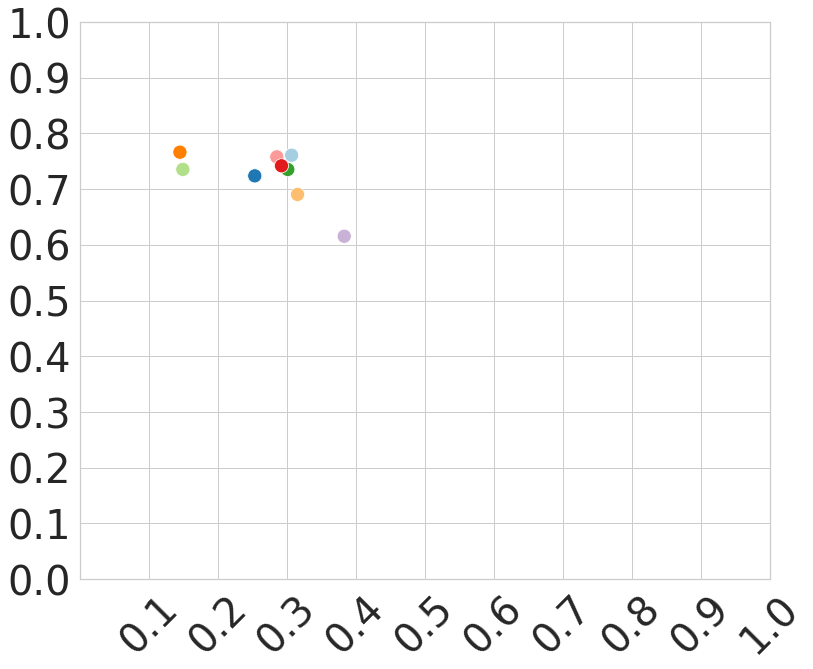

0.2


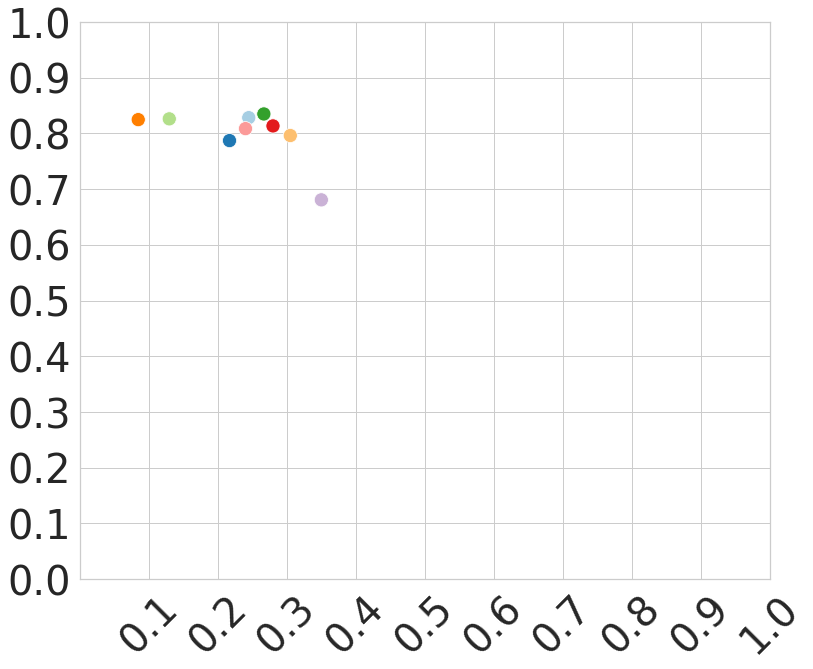

0.4


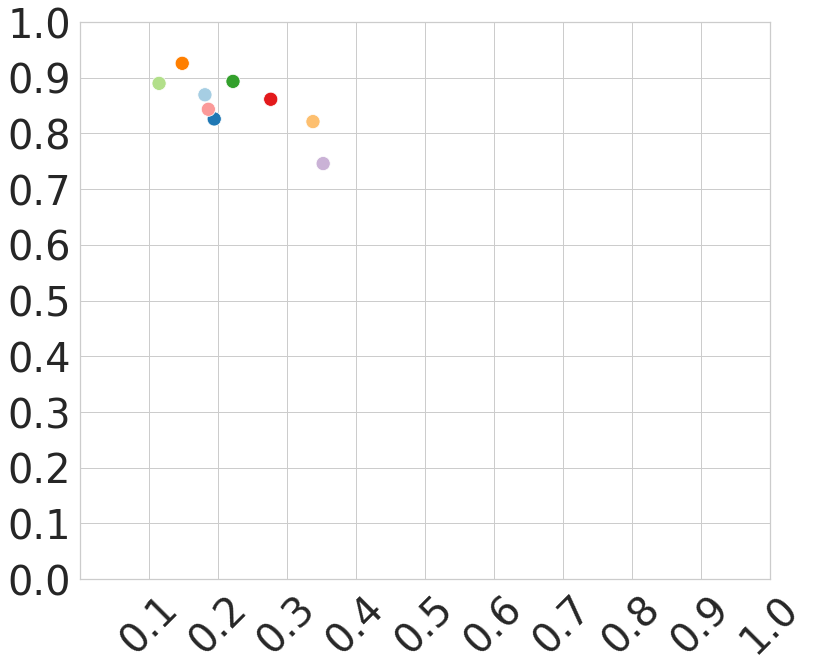

0.8


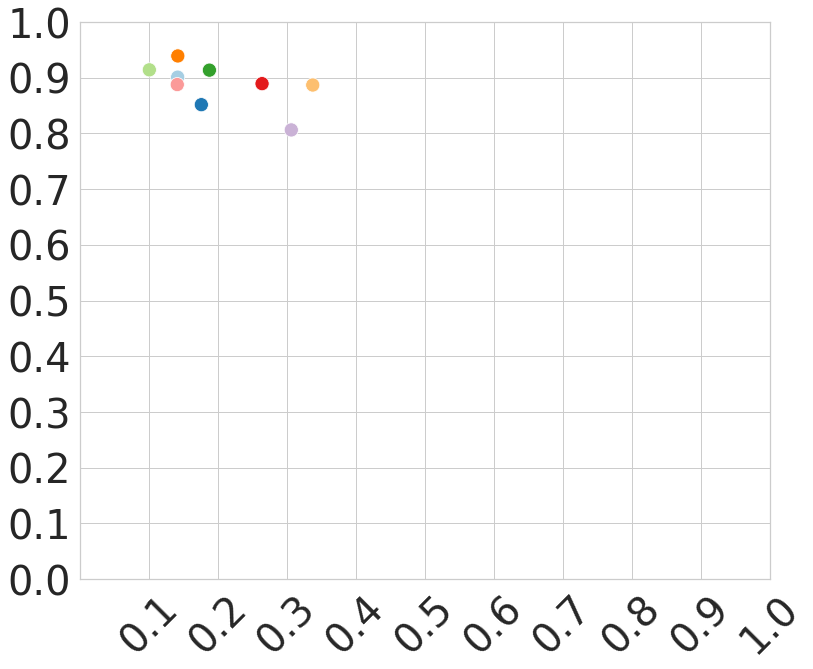

1.0


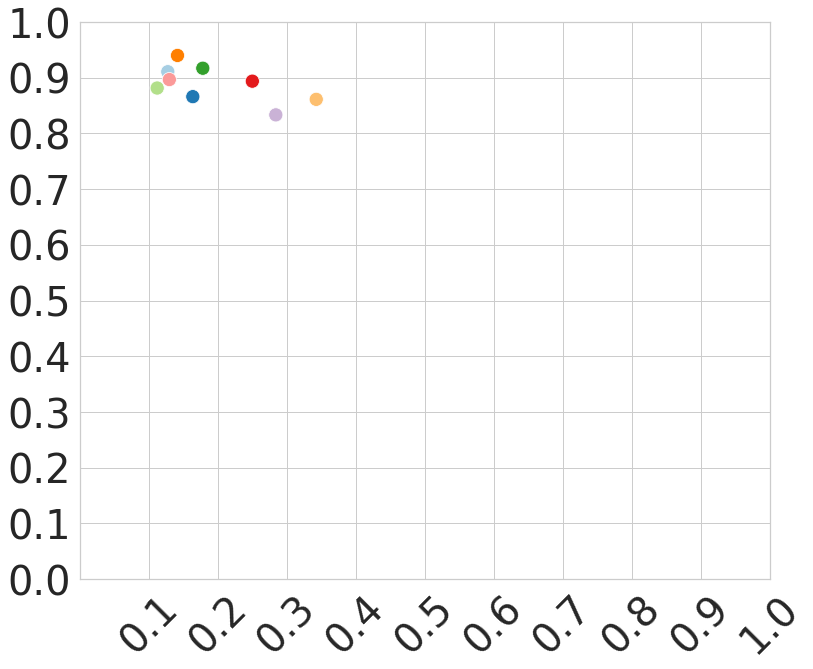

In [57]:
for subsample_fraction in [0.1, 0.2, 0.4, 0.8, 1.0]:
    print(subsample_fraction)
    df = results_df_cmpr[results_df_cmpr['subsample fraction'] == subsample_fraction]
    df = df.groupby(['subsample fraction', 'Architecture'], as_index=False).agg(
                      {'EBM':['mean','std'], 'KNN': ['mean', 'std']})
    df.columns = ['subsample fraction', 'Architecture', 'EBM_mean', 'EBM_std', 'KNN_mean', 'KNN_std']
    
    plt.close("all")
    plt.figure(figsize=(12, 10))
    sns.scatterplot(x='EBM_mean', y='KNN_mean', hue='Architecture', data=df,
                    legend=None, palette=sns.color_palette("Paired", 9), s=200)
#     plt.legend(bbox_to_anchor=(1.05,0.5), borderaxespad=0, loc='center left', prop={'size': 18})
    plt.xlabel('', fontsize=22)
    plt.ylabel("", fontsize=22)
    plt.ylim(0, 1)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlim(0, 1)
    plt.xticks(np.arange(0.1, 1.1, 0.1), rotation=45)
    plt.tight_layout()
    os.makedirs(f"./results/subsample/{data_name}/scatter/", exist_ok=True)
    plt.savefig(f"./results/subsample/{data_name}/scatter/ebm_vs_knn_{subsample_fraction}.pdf", dpi=300)
    plt.show()